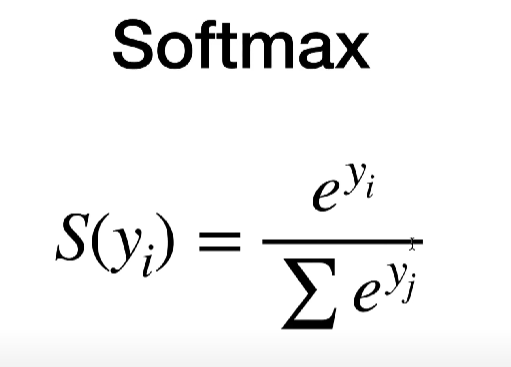

**Squashes the ouptut between zero and one**

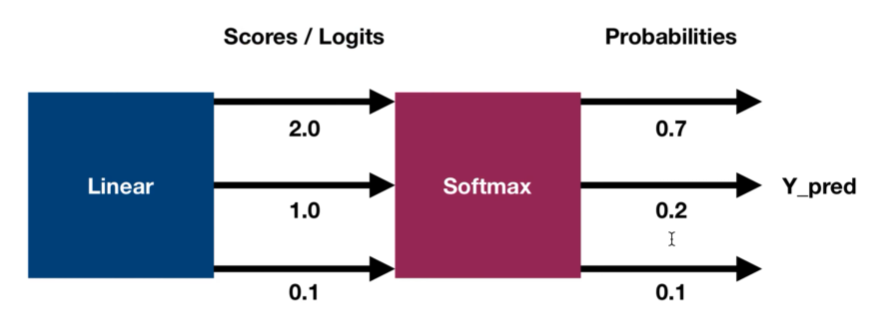

In [2]:
import torch
import torch.nn as nn
import numpy as np

### Softmax function with numpy...

In [3]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis = 0)

## Numpy...

In [4]:
x = np.array([2.0, 1.0, 0.1])

outputs = softmax(x)

print('Softmax numpy: ', outputs)

Softmax numpy:  [0.65900114 0.24243297 0.09856589]


## Pytorch...

In [5]:
x = torch.tensor([2.0, 1.0, 0.1])

outputs = torch.softmax(x, dim = 0) # dim = 0 , so that it computes along the first axis...

print('Softmax PyTorch: ', outputs)

Softmax PyTorch:  tensor([0.6590, 0.2424, 0.0986])


---

### The softmax function is also combined with the cross-entropy loss

### Measures the performance of the classification model whose output is the probabilty between 0 and 1 and is used for multi-class classification...

### The better the prediction the lower the loss (Cross-entropy loss)...

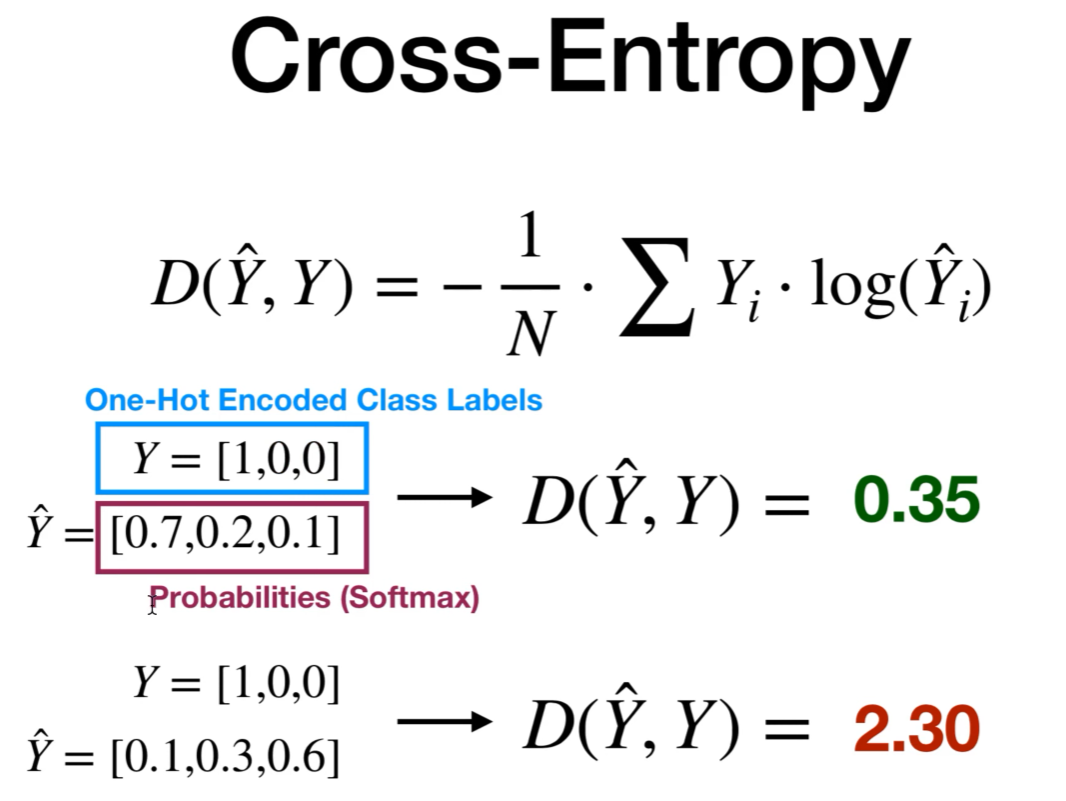


## Numpy Cross-entropy...

In [6]:
def cross_entropy(actual, predicted):
    loss = -np.sum(actual*np.log(predicted))
    return loss

#### Y labels must be one hot encoded...

In [7]:
Y = np.array([1,0,0])

In [9]:
# Y_pred has probabilities....(from the softmax function...)

Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad  = np.array([0.1, 0.3, 0.6])

goodL = cross_entropy(Y, Y_pred_good)
badL = cross_entropy(Y, Y_pred_bad)

print(f'Good Loss: {goodL:.4f}')
print(f'Bad Loss: {badL:.4f}')

Good Loss: 0.3567
Bad Loss: 2.3026


---

## PyTorch Cross-entropy...

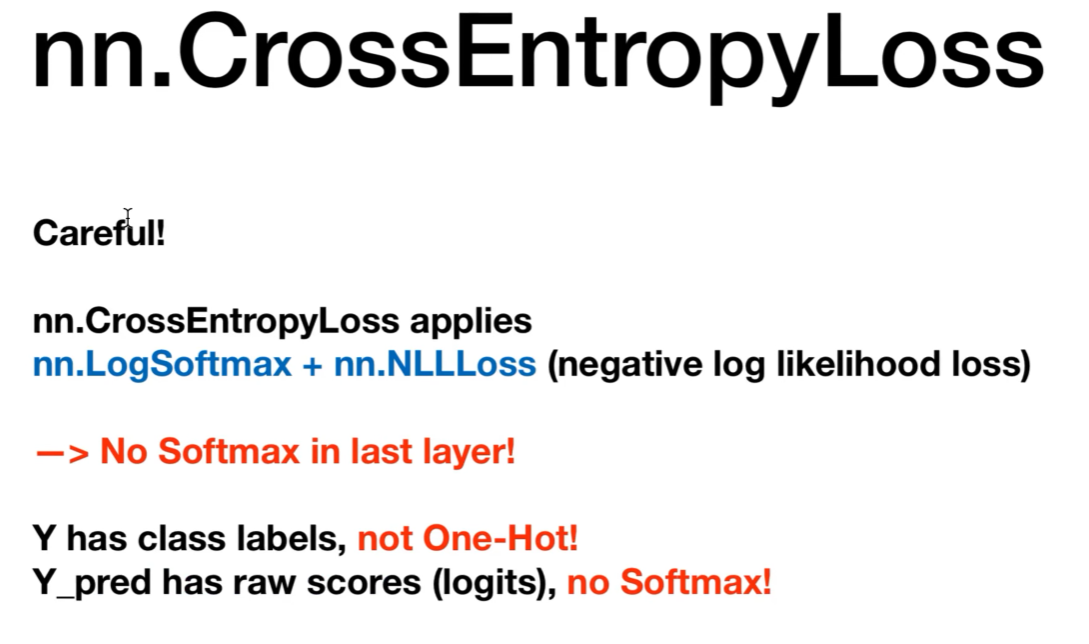

In [41]:
# Defining the loss...
loss = nn.CrossEntropyLoss()
# loss(input, target)

In [42]:
Y = torch.tensor([0]) # Note that its not one-hot encoded...

In [46]:
# Y_pred has to be of the size = Nsamples * Nclasses...so
# for our example it'll be 1 * 3...

# In below example, class 0 has the highest value...
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]]) # Also, these are raw vaules, and we did not apply the softmax function...

Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])

goodL = loss(Y_pred_good, Y)
badL = loss(Y_pred_bad, Y)

print(f'Good Loss: {goodL:.4f}')
print(f'Bad Loss: {badL:.4f}')


Good Loss: 0.4170
Bad Loss: 1.8406


---

### Get the actual predictions...

In [53]:
# torch.max(input, dim, keepdim=False, out=None) 

# Position 0 is the value itself and the second position (prediction1) is the index value...

_ , prediction1 = torch.max(Y_pred_good, 1)
_ , prediction2 = torch.max(Y_pred_bad, 1)

print(f'Actual class: {Y.item()}, Y_pred1: {prediction1.item()}, Y_pred2: {prediction2.item()}')


Actual class: 0, Y_pred1: 0, Y_pred2: 1


---

### Loss in PyTorch allows for multiple samlpes...

In [54]:
# allows batch loss for multiple samples
Y = torch.tensor([2, 0, 1])

In [57]:
# input is of size nBatch x nClasses = 3 x 3
Y_pred_good = torch.tensor(
    [[0.1, 0.2, 3.9], # predict class 2
    [1.2, 0.1, 0.3], # predict class 0
    [0.3, 2.2, 0.2]]) # predict class 1

Y_pred_bad = torch.tensor(
    [[0.9, 0.2, 0.1],
    [0.1, 0.3, 1.5],
    [1.2, 0.2, 0.5]])


l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(f'Batch Loss1:  {l1.item():.4f}')
print(f'Batch Loss2: {l2.item():.4f}')


# get predictions
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y}, Y_pred1: {predictions1}, Y_pred2: {predictions2}')

Batch Loss1:  0.2834
Batch Loss2: 1.6418
Actual class: tensor([2, 0, 1]), Y_pred1: tensor([2, 0, 1]), Y_pred2: tensor([0, 2, 0])


---

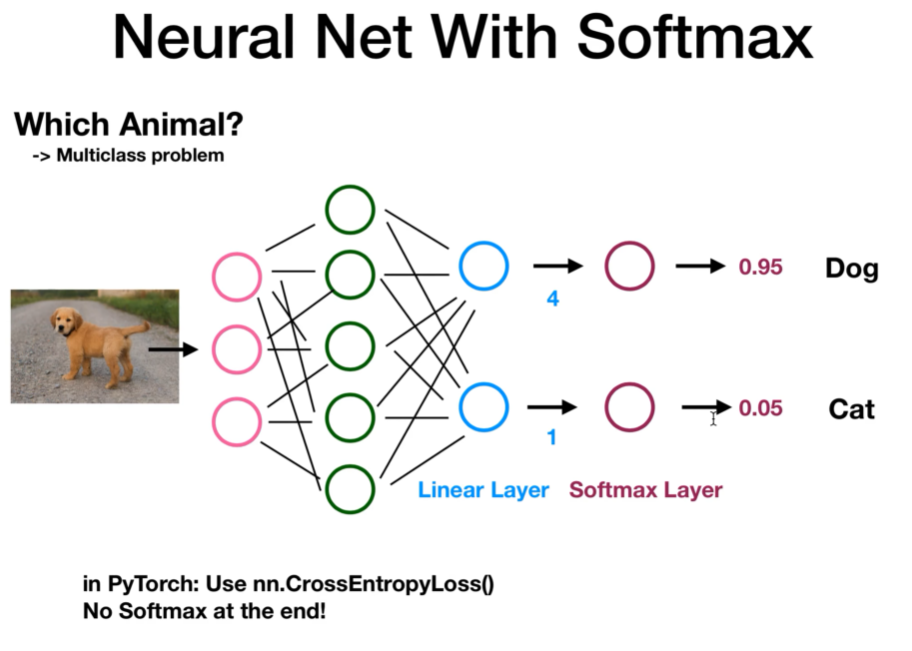

In [ ]:
# Multiclass problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss()  # (applies Softmax)

## Binary Classification with sigmoid function

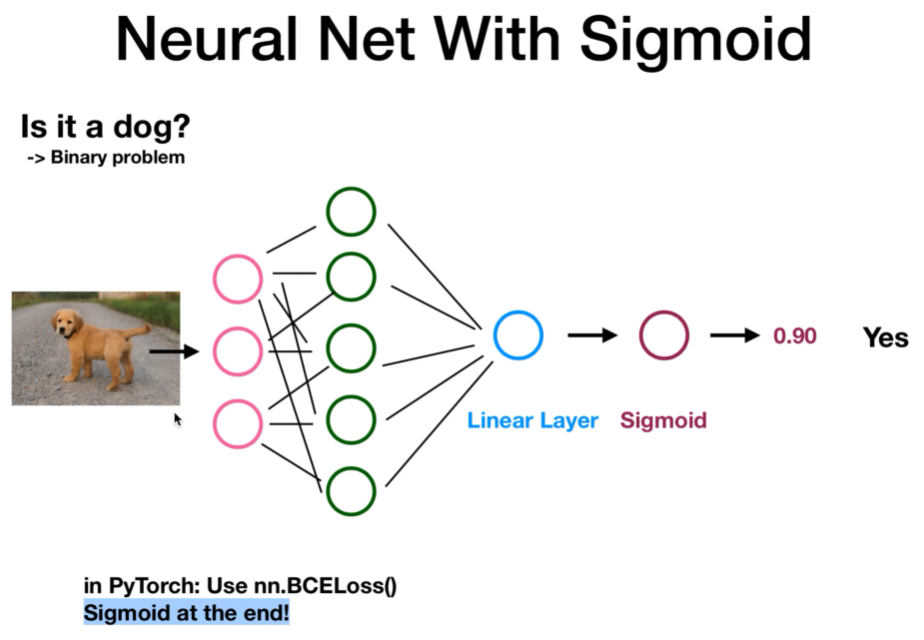

In [ ]:
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__inin__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLu()
        self.linear2 = nn.Linear(hidden_size, 1)
        
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.ReLu(out)
        out = self.linear2(out)
        
        # Sigmoid at the end
        y_pred = torch.sigmoid(out)
        
        return y_pred
    
    
model = NeuralNet1(input_size = 28*28, hidden_size = 5)
criterion = nn.BCELoss()

---